Capstone project based on MIMICiii Db. It has 26 files.
1.	ADMISSIONS.csv
2.	CALLOUT
3.	CAREGIVERS
4.	CHARTEVENTS
5.	CPTEVENTS
6.	DATETIMEEVENTS
7.	DIAGNOSES_ICD
8.	DRGCODES
9.	D_CPT
10.	D_ICD_DIAGNOSES
11.	D_ICD_PROCEDURES
12.	D_ITEMS
13.	D_LABITEMS
14.	ICUSTAYS
15.	INPUTEVENTS_CV
16.	INPUTEVENTS_MV
17.	LABEVENTS
18.	MICROBIOLOGYEVENTS
19.	NOTEEVENTS
20.	OUTPUTEVENTS
21.	PATIENTS
22.	PRESCRIPTIONS
23.	PROCEDUREEVENTS_MV
24.	PROCEDURES_ICD
25.	SERVICES
26.	TRANSFERS

However for the project we will only load ADMISSIONS and DIAGNOSES files. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#Import these to try out the Pandas profiling tool
from pathlib import Path
import requests
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
import datetime
#from library.sb_utils import save_file

In [2]:
#file1
dfADMISSIONS = pd.read_csv(r'C:\Users\mkhan74\Documents\MIMICiiiDup\ADMISSIONS.csv')
dfADMISSIONS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

Convert ADMITTIME & DISCHTIME to date time type, the DEATHTIME has a lot of NaNs so won't convert, do that after looking at the rest of the data and dropping the NaNs. 

In [3]:
dfADMISSIONS['ADMITTIME'] = dfADMISSIONS['ADMITTIME'].astype(str)
dfADMISSIONS['ADMITTIME'] = dfADMISSIONS['ADMITTIME'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
dfADMISSIONS['DISCHTIME'] = dfADMISSIONS['DISCHTIME'].astype(str)
dfADMISSIONS['DISCHTIME'] = dfADMISSIONS['DISCHTIME'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [4]:
print(dfADMISSIONS['ADMISSION_TYPE'].value_counts())

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64


dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('EMERGENCY', 1)
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('NEWBORN', 2)
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('ELECTIVE', 3)
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('URGENT', 4)

In [5]:
print(dfADMISSIONS['ADMISSION_LOCATION'].value_counts())

EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64


In [6]:
print(dfADMISSIONS['DISCHARGE_LOCATION'].value_counts())

HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64


In [7]:
#Drop the columns that can help with any prediction leave the admit and discharge columns for now till EDA is complete
colstodrop = ['ROW_ID' ,'INSURANCE','LANGUAGE','RELIGION','MARITAL_STATUS','ETHNICITY','EDREGTIME','EDOUTTIME','HAS_CHARTEVENTS_DATA','HOSPITAL_EXPIRE_FLAG']
dfADMISSIONS.drop(colstodrop ,axis=1,inplace=True)

In [8]:
dfADMISSIONS = dfADMISSIONS.drop_duplicates(['HADM_ID'],keep= 'last')
dfADMISSIONS

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,DIAGNOSIS
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,BENZODIAZEPINE OVERDOSE
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,BRAIN MASS
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,INTERIOR MYOCARDIAL INFARCTION
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,ACUTE CORONARY SYNDROME
...,...,...,...,...,...,...,...,...,...
58971,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,TRAUMA
58972,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,SAH
58973,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,RENAL CANCER/SDA
58974,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,S/P FALL


Each row of this table contains a unique HADM_ID, which represents a single patient’s admission to the hospital. HADM_ID ranges from 1000000 - 1999999. It is possible for this table to have duplicate SUBJECT_ID,

In [9]:
#dfADMISSIONS.shape

# We have 58976 admissions

In [10]:
print(dfADMISSIONS['DIAGNOSIS'].unique())

['BENZODIAZEPINE OVERDOSE'
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA' 'BRAIN MASS'
 ... 'R/O METASTASIS'
 'GASTROPARESIS\\PLACEMENT OF G-TUBE **REMOTE WEST**/SDA' 'JOINT EFFUSION']


In [11]:
print(dfADMISSIONS['DIAGNOSIS'].value_counts().sort_values(ascending=False))

NEWBORN                                                             7823
PNEUMONIA                                                           1566
SEPSIS                                                              1184
CONGESTIVE HEART FAILURE                                             928
CORONARY ARTERY DISEASE                                              840
                                                                    ... 
RIGHT LOWER LOBE PNEUMONIA                                             1
MR\MITRAL VALVE REPAIR REPLACEMENT/SDA                                 1
ATRIAL TACHYCARDIA/ MECHANICAL VALVE\ATRIAL TACHYCARDIA ABLATION       1
RIGHT FEMERAL FRACTURE                                                 1
S/P STRUCK BY CAR                                                      1
Name: DIAGNOSIS, Length: 15691, dtype: int64


In [12]:
dfADMISSIONS.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,DIAGNOSIS
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,BENZODIAZEPINE OVERDOSE
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,BRAIN MASS
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,INTERIOR MYOCARDIAL INFARCTION
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,ACUTE CORONARY SYNDROME


#body.groupby(['make','body-style']).size().reset_index(name='count')
#dfADMISSIONS ['DIAGNOSIS'].value_counts()
diagCount = (dfADMISSIONS.groupby(['DIAGNOSIS']).count() > 500)
#print(dfADMISSIONS['DIAGNOSIS'].value_counts() > 400)
diagCount=diagCount.reset_index()
diagCount
#dfADMISSIONS['CountofDiag'] = dfADMISSIONS['DIAGNOSIS'].  + +1

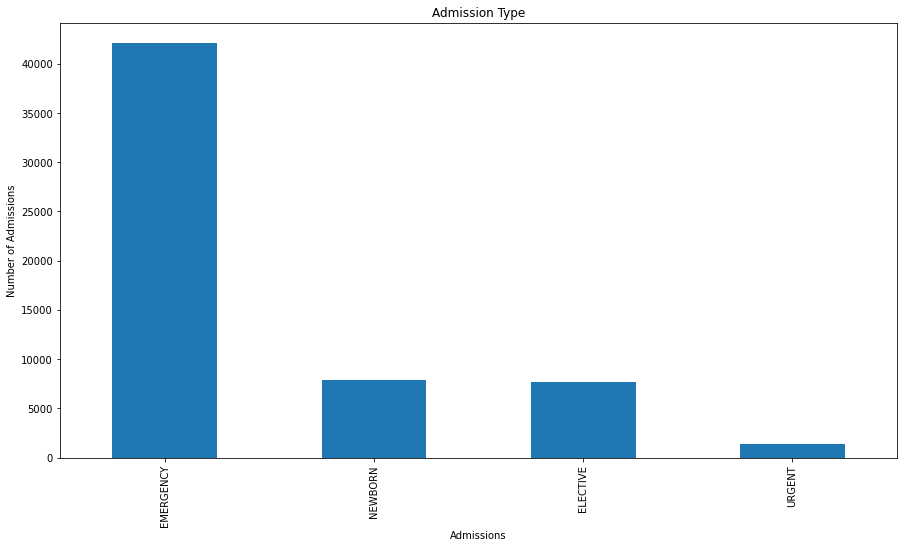

In [13]:
# Create a graph for Admission Type
dfADMISSIONS['ADMISSION_TYPE'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Admission Type')
plt.ylabel('Number of Admissions')
plt.xlabel('Admissions')
plt.show()

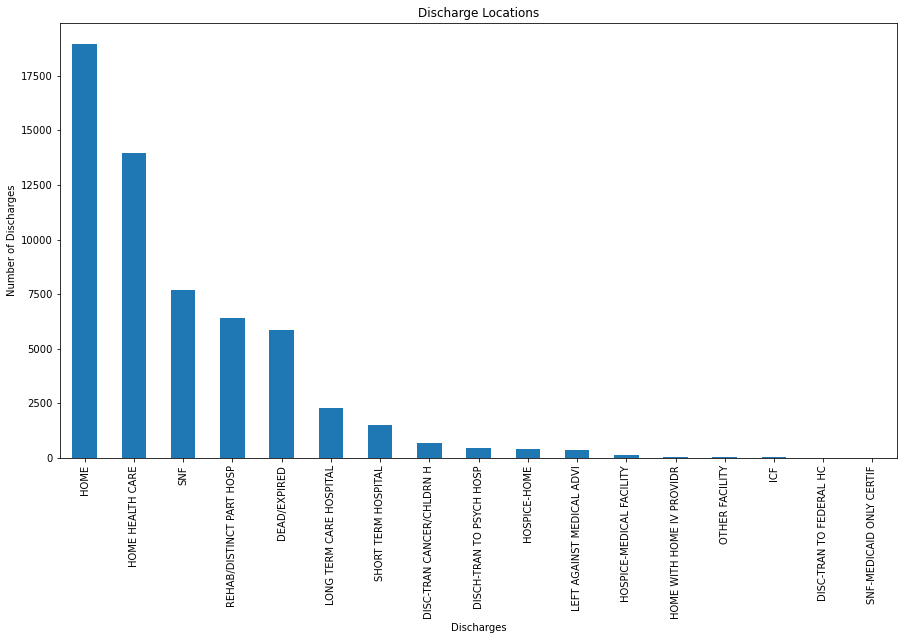

In [14]:
#Create a graph for Discharge Locations
dfADMISSIONS['DISCHARGE_LOCATION'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Discharge Locations')
plt.ylabel('Number of Discharges')
plt.xlabel('Discharges')
plt.show()

dfdiagCount  = pd.DataFrame(diagCount)
dfdiagCount = dfADMISSIONS['DIAGNOSIS'].value_counts().plot(kind='hist',figsize=(15,8))
plt.title('Discharge Locations')
plt.ylabel('Number of Discharges')
plt.xlabel('Discharges')
plt.show()

In [15]:
dfADMISSIONS['DIAGNOSIS'].value_counts()

NEWBORN                                                            7823
PNEUMONIA                                                          1566
SEPSIS                                                             1184
CONGESTIVE HEART FAILURE                                            928
CORONARY ARTERY DISEASE                                             840
                                                                   ... 
SEPSIS;THROMBOCYTOPENIA;MENTAL STATUS CHANGES                         1
SUBARACHNOID HEMORRHAGE;PEDESTRIAN STRUCK                             1
AROTIC STENOSIS\AORTIC VALVE / ASCENDING AORTA REPLACEMENT /SDA       1
WOUND INFECTION R/O SEPSIS                                            1
DIAPHRAGMATIC INJURY                                                  1
Name: DIAGNOSIS, Length: 15691, dtype: int64

In [16]:
#Create a list for top 10 Diagnosis in the frame. Plotting for 15691 distinct diagnosis is not possible. 
n=10
diagCount = dfADMISSIONS['DIAGNOSIS'].value_counts()[:n].index.tolist()
print(diagCount)

['NEWBORN', 'PNEUMONIA', 'SEPSIS', 'CONGESTIVE HEART FAILURE', 'CORONARY ARTERY DISEASE', 'CHEST PAIN', 'INTRACRANIAL HEMORRHAGE', 'ALTERED MENTAL STATUS', 'GASTROINTESTINAL BLEED', 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA']


In [17]:
#Create a new dataframe for only top 10 diagnosis 
dfplot = dfADMISSIONS[dfADMISSIONS['DIAGNOSIS'].isin(diagCount)]
dfplot.head(10)

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,DIAGNOSIS
6,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,NEWBORN
15,36,182104,2131-04-30 07:15:00,2131-05-08 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...
18,37,188670,2183-08-21 16:48:00,2183-08-26 18:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,CONGESTIVE HEART FAILURE
20,39,106266,2114-11-29 21:04:00,2114-12-09 15:10:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,NEWBORN
22,357,174486,2197-12-06 07:13:00,2198-01-03 14:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,GASTROINTESTINAL BLEED
24,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,SEPSIS
25,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,PNEUMONIA
26,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,ALTERED MENTAL STATUS
27,358,110872,2168-10-24 23:48:00,2168-10-29 03:23:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,NEWBORN
34,363,196503,2176-03-01 15:26:00,2176-03-03 14:04:00,NaN,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME,NEWBORN


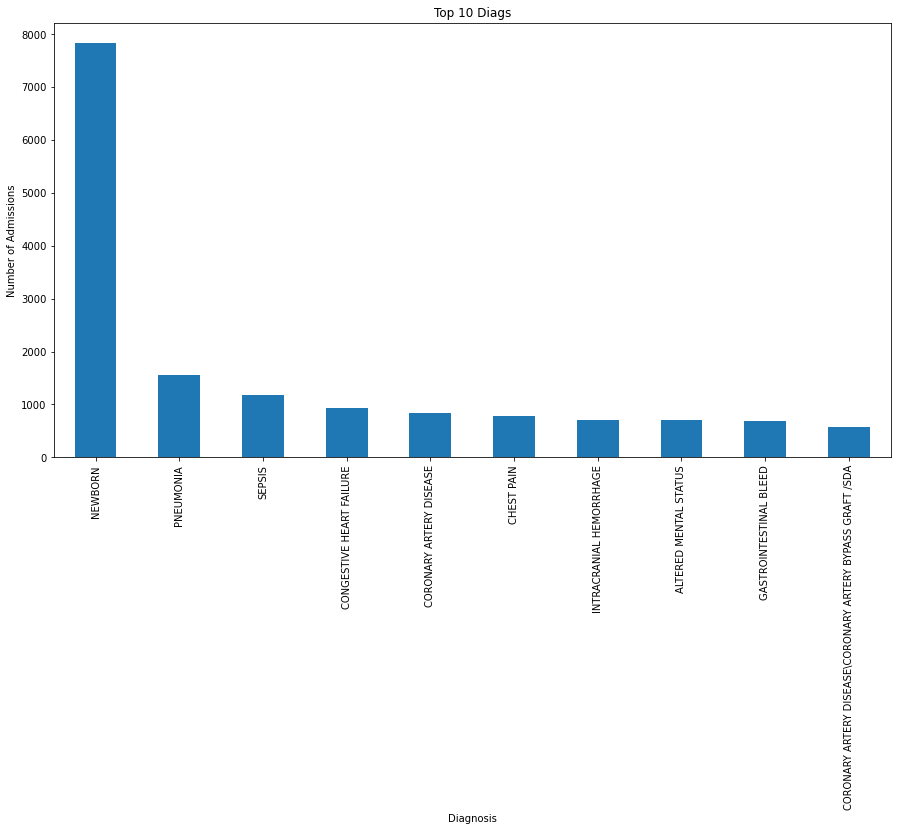

In [18]:
#Now use the smaller dataframe to draw the graph. 
dfplot['DIAGNOSIS'].value_counts().plot(kind='bar',figsize=(15,8))
plt.title('Top 10 Diags')
plt.ylabel('Number of Admissions')
plt.xlabel('Diagnosis')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NEWBORN'),
  Text(1, 0, 'PNEUMONIA'),
  Text(2, 0, 'SEPSIS'),
  Text(3, 0, 'CONGESTIVE HEART FAILURE'),
  Text(4, 0, 'CORONARY ARTERY DISEASE'),
  Text(5, 0, 'CHEST PAIN'),
  Text(6, 0, 'INTRACRANIAL HEMORRHAGE'),
  Text(7, 0, 'ALTERED MENTAL STATUS'),
  Text(8, 0, 'GASTROINTESTINAL BLEED'),
  Text(9, 0, 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT /SDA')])

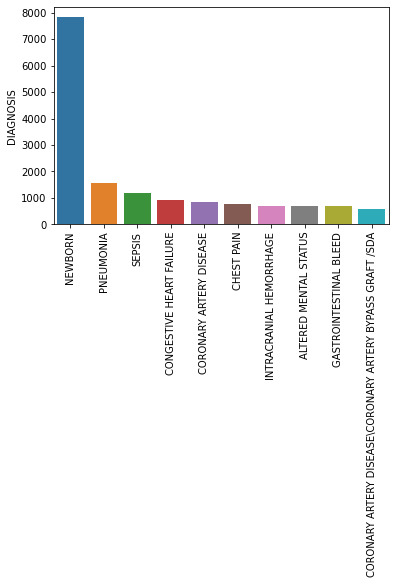

In [19]:
sns.barplot(x=dfplot.DIAGNOSIS.value_counts().index, y=dfplot.DIAGNOSIS.value_counts())
plt.xticks(rotation=90)

In [20]:
#replace Admission Types with number for the model
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('EMERGENCY', 1)
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('NEWBORN', 2)
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('ELECTIVE', 3)
dfADMISSIONS.ADMISSION_TYPE = dfADMISSIONS.ADMISSION_TYPE.replace('URGENT', 4)

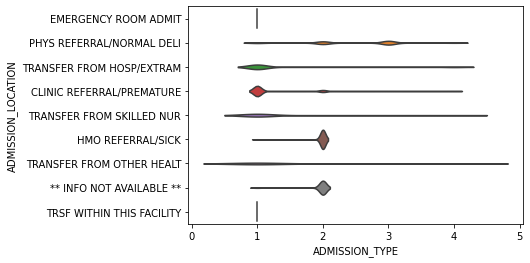

In [21]:
dfADMISSIONS = dfADMISSIONS.dropna(subset=['ADMISSION_TYPE','ADMISSION_LOCATION'])
sns.violinplot(x='ADMISSION_TYPE', y='ADMISSION_LOCATION', data=dfADMISSIONS, inner=None)
plt.show()

In [22]:
#find subjects admitted more than once
#dfAdmitmoretimes = dfADMISSIONS.drop_duplicates(['SUBJECT_ID'],keep= 'last')

In [23]:
#dfAdmitmoretimes.info()

Now bring in the patient file, analyze and clean up

In [24]:
dfPATIENTS = pd.read_csv(r'C:\Users\mkhan74\Documents\MIMICiiiDup\PATIENTS.csv')
dfPATIENTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [25]:
dfPATIENTS.head(5)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [26]:
#DOD is the date of death for the given patient. DOD_HOSP is the date of death as recorded in the hospital database. 
#DOD_SSN is the date of death from the social security database. We have death tim in dfAdmissions so we don't need these death columns
dropcols = ['ROW_ID' ,'DOB','DOD','DOD_HOSP','DOD_HOSP','DOD_SSN',]
dfPATIENTS.drop(dropcols ,axis=1,inplace=True)
dfPATIENTS.sample(5)

,SUBJECT_ID,GENDER,EXPIRE_FLAG
45595,82574,M,0
19290,22932,M,0
10469,11896,F,0
32083,24041,M,0
10905,11980,M,1


In [27]:
dfPATIENTS = dfPATIENTS.drop_duplicates(['SUBJECT_ID'],keep= 'last')
dfPATIENTS.shape

(46520, 3)

# We have 46520 patients

In [28]:
print(dfPATIENTS['EXPIRE_FLAG'].value_counts())

0    30761
1    15759
Name: EXPIRE_FLAG, dtype: int64


In [29]:
from functools import reduce
df = reduce(lambda x,y: pd.merge(x,y, on='SUBJECT_ID', how='outer'), [dfADMISSIONS,dfPATIENTS])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SUBJECT_ID          58976 non-null  int64         
 1   HADM_ID             58976 non-null  int64         
 2   ADMITTIME           58976 non-null  datetime64[ns]
 3   DISCHTIME           58976 non-null  datetime64[ns]
 4   DEATHTIME           5854 non-null   object        
 5   ADMISSION_TYPE      58976 non-null  int64         
 6   ADMISSION_LOCATION  58976 non-null  object        
 7   DISCHARGE_LOCATION  58976 non-null  object        
 8   DIAGNOSIS           58951 non-null  object        
 9   GENDER              58976 non-null  object        
 10  EXPIRE_FLAG         58976 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 5.4+ MB


In [31]:
print(df['GENDER'].value_counts())

M    32950
F    26026
Name: GENDER, dtype: int64


In [32]:
df.GENDER = df.GENDER.replace('M', 1)
df.GENDER = df.GENDER.replace('F', 0)

In [33]:
df.loc[df['ADMITTIME'].notnull(), 'Admitted'] = 1

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SUBJECT_ID          58976 non-null  int64         
 1   HADM_ID             58976 non-null  int64         
 2   ADMITTIME           58976 non-null  datetime64[ns]
 3   DISCHTIME           58976 non-null  datetime64[ns]
 4   DEATHTIME           5854 non-null   object        
 5   ADMISSION_TYPE      58976 non-null  int64         
 6   ADMISSION_LOCATION  58976 non-null  object        
 7   DISCHARGE_LOCATION  58976 non-null  object        
 8   DIAGNOSIS           58951 non-null  object        
 9   GENDER              58976 non-null  int64         
 10  EXPIRE_FLAG         58976 non-null  int64         
 11  Admitted            58976 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 5.8+ MB


In [35]:
dropcols = ['SUBJECT_ID','HADM_ID','ADMITTIME', 'DISCHTIME','DEATHTIME', 'ADMISSION_LOCATION','DISCHARGE_LOCATION']
df.drop(dropcols,axis=1,inplace=True)

In [36]:
df.dropna()

,ADMISSION_TYPE,DIAGNOSIS,GENDER,EXPIRE_FLAG,Admitted
0,1,BENZODIAZEPINE OVERDOSE,0,0,1.0
1,3,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1,0,1.0
2,1,BRAIN MASS,1,0,1.0
3,1,INTERIOR MYOCARDIAL INFARCTION,1,0,1.0
4,1,ACUTE CORONARY SYNDROME,1,0,1.0
...,...,...,...,...,...
58971,3,AORTIC STENOSIS\AORTIC VALVE REPLACEMENT /SDA,1,0,1.0
58972,1,ALTERED MENTAL STATUS,1,1,1.0
58973,1,TRAUMA,0,0,1.0
58974,1,SAH,0,1,1.0


In [37]:
df.info()
#save df to file locally so you don't need to re-run the entire notebaook for second model
df.to_csv(r'C:\Users\mkhan74\Documents\MIMICiiiDup\mergedData.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ADMISSION_TYPE  58976 non-null  int64  
 1   DIAGNOSIS       58951 non-null  object 
 2   GENDER          58976 non-null  int64  
 3   EXPIRE_FLAG     58976 non-null  int64  
 4   Admitted        58976 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.7+ MB


In [38]:
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc 

In [39]:
y = df['EXPIRE_FLAG']
X = df.drop(['EXPIRE_FLAG'],axis=1)

In [40]:
X.head()

,ADMISSION_TYPE,DIAGNOSIS,GENDER,Admitted
0,1,BENZODIAZEPINE OVERDOSE,0,1.0
1,3,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,1,1.0
2,1,BRAIN MASS,1,1.0
3,1,INTERIOR MYOCARDIAL INFARCTION,1,1.0
4,1,ACUTE CORONARY SYNDROME,1,1.0


In [41]:
df = pd.get_dummies(X, columns=['ADMISSION_TYPE','DIAGNOSIS'])

In [42]:
df.head()

,GENDER,Admitted,ADMISSION_TYPE_1,ADMISSION_TYPE_2,ADMISSION_TYPE_3,ADMISSION_TYPE_4,DIAGNOSIS_ MITRAL STENOSIS\MITRAL VALVE REPLACEMENT /SDA,DIAGNOSIS_ DUODENAL MASS/SDA,DIAGNOSIS_ ? SEROTONIN SYNDROME,DIAGNOSIS_ ABDOMINAL AORTIC ANEURYSM/SDA,...,DIAGNOSIS_WOUND INFECTION R/O SEPSIS,DIAGNOSIS_WOUND INFECTION'OSTEOMYELITIS,DIAGNOSIS_WOUND INFECTION;HYPOTENSION,DIAGNOSIS_WOUND INFECTION;TELEMETRY,DIAGNOSIS_WOUND TO RLE,DIAGNOSIS_WOUND ULCER,DIAGNOSIS_ZENKER'S DIVERTICULUM/SDA,DIAGNOSIS_ZONE 2 NECK INJURY,DIAGNOSIS_ZOSTER VS. MENINGITIS,DIAGNOSIS_ZYGOMATIC FRACTURE LEFT
0,0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58976 entries, 0 to 58975
Columns: 15697 entries, GENDER to DIAGNOSIS_ZYGOMATIC FRACTURE LEFT
dtypes: float64(1), int64(1), uint8(15695)
memory usage: 884.1 MB


In [44]:
scaler = preprocessing.StandardScaler().fit(df)
X_scaled = scaler.transform(df)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25, random_state=1)

In [46]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=20, max_depth = 7, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.615
Accuracy score (validation): 0.623

Learning rate:  0.1
Accuracy score (training): 0.618
Accuracy score (validation): 0.625

Learning rate:  0.25
Accuracy score (training): 0.644
Accuracy score (validation): 0.633

Learning rate:  0.5
Accuracy score (training): 0.667
Accuracy score (validation): 0.653

Learning rate:  0.75
Accuracy score (training): 0.666
Accuracy score (validation): 0.651

Learning rate:  1
Accuracy score (training): 0.666
Accuracy score (validation): 0.650



In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
#create the classifer
gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=.5, max_features=30, max_depth=10, random_state=0)
#now fit the model
model = gbc.fit(X_train, y_train)
#predict
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[8063 1126]
 [3787 1768]]
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.88      0.77      9189
           1       0.61      0.32      0.42      5555

    accuracy                           0.67     14744
   macro avg       0.65      0.60      0.59     14744
weighted avg       0.65      0.67      0.64     14744



Accuracy score (training): 0.726
Accuracy score (validation): 0.667


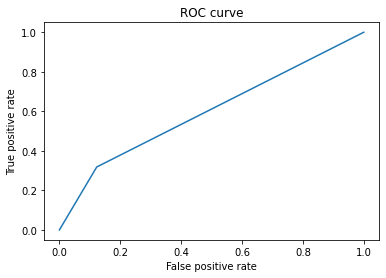

In [48]:
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
fp, tp, _ = roc_curve(y_test, y_pred)
print("Accuracy score (training): {0:.3f}".format(gbc.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gbc.score(X_test, y_test)))
plt.plot(fp, tp)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Read in the Cleaned file and use Logistic Regression for the same problem. 

In [49]:
df2 = pd.read_csv(r'C:\Users\mkhan74\Documents\MIMICiiiDup\mergedData.csv')

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ADMISSION_TYPE  58976 non-null  int64  
 1   DIAGNOSIS       58951 non-null  object 
 2   GENDER          58976 non-null  int64  
 3   EXPIRE_FLAG     58976 non-null  int64  
 4   Admitted        58976 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ MB


In [51]:
df2 = pd.get_dummies(X, columns=['ADMISSION_TYPE','DIAGNOSIS'])

In [52]:
import sklearn
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc 

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.25, random_state=1)

In [54]:
scaler = preprocessing.StandardScaler().fit(df2)
X_scaled = scaler.transform(df2)

In [55]:
classifier  = LogisticRegression(class_weight='balanced',max_iter=300)
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=300)

In [56]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4491 4698]
 [ 885 4670]]


In [57]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.49      0.62      9189
           1       0.50      0.84      0.63      5555

    accuracy                           0.62     14744
   macro avg       0.67      0.66      0.62     14744
weighted avg       0.71      0.62      0.62     14744



Accuracy score (training): 0.777
Accuracy score (validation): 0.621


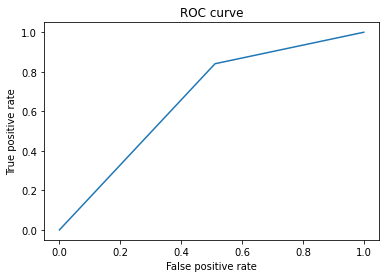

In [59]:
fp, tp, _ = roc_curve(y_test, y_pred)
print("Accuracy score (training): {0:.3f}".format(classifier.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(classifier.score(X_test, y_test)))
plt.plot(fp, tp)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()